<a href="https://colab.research.google.com/github/PARKHYOUNJUNG/phj_lms23/blob/main/CODE/PHJ_13days.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# (라이브러리 설치 후 런타임 재시작 필요)
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 2s (4,278 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 122349 files and di

In [2]:
!pip install pykrx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.5/125.5 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.1/52.1 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 246.1/246.1 kB 7.4 MB/s eta 0:00:00


In [3]:
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Matplotlib 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic')    

In [2]:
from pykrx import stock
df = stock.get_etf_ohlcv_by_date("20200101", "20230412", "069660") #KOSEF200
df.tail()

,NAV,시가,고가,저가,종가,거래량,거래대금,기초지수
날짜,,,,,,,,
2023-04-06,32382.13,32770,32775,32340,32370,9046,295276735,317.82
2023-04-07,32944.64,32685,32945,32615,32895,12196,399247975,323.36
2023-04-10,33255.12,32860,33335,32860,33205,34348,1143088345,326.38
2023-04-11,33711.25,33210,33720,33210,33620,85569,2874216790,330.87
2023-04-12,33837.26,33535,33840,33535,33755,16901,569488955,332.08


In [3]:
import plotly.express as px

df = pd.DataFrame({'자산군':['주식', '장기채권', '중기채권', '원자재', '금'],
                  '비율':[30, 40, 15, 7.5, 7.5]})
fig = px.pie(df, values = '비율', names='자산군',
             title='올시즌 포트폴리오', template="plotly_white")
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [8]:
df_tic = pd.DataFrame({'ticker':[],'tic_name':[]})

for ticker in stock.get_etf_ticker_list(date='20230410'):
  df_tic.loc[len(df_tic)]=[ticker,stock.get_etf_ticker_name(ticker)]

df_tic.tail()

,ticker,tic_name
688,195980,ARIRANG 신흥국MSCI(합성 H)
689,433250,UNICORN R&D 액티브
690,215620,HK S&P코리아로우볼
691,391670,HK 베스트일레븐액티브
692,391680,HK 하이볼액티브


In [26]:
df_tic[df_tic['tic_name'].str.count('10') > 0]
# df_tic[df_tic['ticker']=='520003']

,ticker,tic_name
3,159800,마이티 코스피100
49,295020,KBSTAR 국채선물10년인버스
50,295000,KBSTAR 국채선물10년
66,315960,KBSTAR 대형고배당10TR
73,368590,KBSTAR 미국나스닥100
89,174360,KBSTAR 중국본토대형주CSI100
105,407310,HANARO 200 TOP10
110,448490,HANARO 32-10 국고채액티브
142,140950,파워 코스피100
165,447820,TIGER 24-10 회사채(A+이상)액티브


In [27]:
def create_portfolio_base():
  category = ['주식', '장기채권', '중기채권', '원자재', '금']
    # category = ['채권', '금', '달러', '배당주', '국내주식', '해외주식']
  # ratio = [30, 20, 10, 15, 10, 15]
  ratio = [30, 40, 15, 7.5, 7.5]
  ticker = ['069660','363570','152380','271050','411060']
  #KOSEF 200, KODEX 장기종합채권(AA-이상)액티브KAP, KODEX 국채선물10년, KODEX WTI원유선물인버스(H) #ACE KRX금현물
  df = pd.DataFrame({'자산군': category,'세팅비중': ratio,'티커': ticker})
  return df

base_df = create_portfolio_base()
base_df

,자산군,세팅비중,티커
0,주식,30.0,069660
1,장기채권,40.0,363570
2,중기채권,15.0,152380
3,원자재,7.5,271050
4,금,7.5,411060


In [30]:
def set_monthly_pred_investment(df, total):
  invest_ratio = []
  for i in df['세팅비중']:
    invest_ratio.append(total*i/100)
  df['예상투자금'] = invest_ratio
  return df

In [31]:
df = set_monthly_pred_investment(base_df, 1000000)
df

,자산군,세팅비중,티커,예상투자금
0,주식,30.0,069660,300000.0
1,장기채권,40.0,363570,400000.0
2,중기채권,15.0,152380,150000.0
3,원자재,7.5,271050,75000.0
4,금,7.5,411060,75000.0


In [32]:
def set_etf_name(df):
  name = []
  for i in df['티커']:
    name.append(stock.get_etf_ticker_name(i))
  df['종목명'] = name
  return df

In [33]:
df = set_etf_name(df)
df

,자산군,세팅비중,티커,예상투자금,종목명
0,주식,30.0,069660,300000.0,KOSEF 200
1,장기채권,40.0,363570,400000.0,KODEX 장기종합채권(AA-이상)액티브KAP
2,중기채권,15.0,152380,150000.0,KODEX 국채선물10년
3,원자재,7.5,271050,75000.0,KODEX WTI원유선물인버스(H)
4,금,7.5,411060,75000.0,ACE KRX금현물


In [34]:
from datetime import datetime, timedelta
def set_current_price(df, date):
    flag = True
    ohlcv_df = None
    while flag:
        ohlcv_df = stock.get_etf_ohlcv_by_ticker(date)
        if len(ohlcv_df) == 0:
            if type(date) == str:
                date = datetime.strptime(date, '%Y-%m-%d')
            date_obj = date + timedelta(days=1)
            date = str(date_obj)[:10]
        else:
            flag = False

    price = []
    for i in df['티커']:
        if ohlcv_df.index.isin([i]).sum() > 0:
            price.append(ohlcv_df.loc[i, '종가'])
        else:
            print('{}에 {}가 존재하지 않습니다.'.format(date, i))
            price.append(0)
    df['현재가'] = price
    df['투자날짜'] = str(date)[:10]
    return df

In [35]:
df = set_current_price(df, '2023-04-10')
df

,자산군,세팅비중,티커,예상투자금,종목명,현재가,투자날짜
0,주식,30.0,069660,300000.0,KOSEF 200,33205,2023-04-10
1,장기채권,40.0,363570,400000.0,KODEX 장기종합채권(AA-이상)액티브KAP,89905,2023-04-10
2,중기채권,15.0,152380,150000.0,KODEX 국채선물10년,65260,2023-04-10
3,원자재,7.5,271050,75000.0,KODEX WTI원유선물인버스(H),4670,2023-04-10
4,금,7.5,411060,75000.0,ACE KRX금현물,12205,2023-04-10


In [36]:
def get_volume(df):
    df['수량'] = np.round(df['예상투자금']/df['현재가'])
    df['수량'].replace(np.inf, 0, inplace= True)
    df['수량'] = df['수량'].astype(int)
    return df

In [37]:
df = get_volume(df)
df

,자산군,세팅비중,티커,예상투자금,종목명,현재가,투자날짜,수량
0,주식,30.0,069660,300000.0,KOSEF 200,33205,2023-04-10,9
1,장기채권,40.0,363570,400000.0,KODEX 장기종합채권(AA-이상)액티브KAP,89905,2023-04-10,4
2,중기채권,15.0,152380,150000.0,KODEX 국채선물10년,65260,2023-04-10,2
3,원자재,7.5,271050,75000.0,KODEX WTI원유선물인버스(H),4670,2023-04-10,16
4,금,7.5,411060,75000.0,ACE KRX금현물,12205,2023-04-10,6


In [38]:
def get_monthly_investment(df):
    df['실투자금'] = df['현재가']*df['수량']
    return df

In [39]:
df = get_monthly_investment(df)
df

,자산군,세팅비중,티커,예상투자금,종목명,현재가,투자날짜,수량,실투자금
0,주식,30.0,069660,300000.0,KOSEF 200,33205,2023-04-10,9,298845
1,장기채권,40.0,363570,400000.0,KODEX 장기종합채권(AA-이상)액티브KAP,89905,2023-04-10,4,359620
2,중기채권,15.0,152380,150000.0,KODEX 국채선물10년,65260,2023-04-10,2,130520
3,원자재,7.5,271050,75000.0,KODEX WTI원유선물인버스(H),4670,2023-04-10,16,74720
4,금,7.5,411060,75000.0,ACE KRX금현물,12205,2023-04-10,6,73230


In [40]:
sum(df['실투자금'])

936935

In [41]:
def get_portfolio_by_date(total, date):
    base_df = create_portfolio_base()
    df = set_monthly_pred_investment(base_df, total)
    df = set_etf_name(df)
    df = set_current_price(df, date)
    df = get_volume(df)
    df = get_monthly_investment(df)
    return df

In [42]:
april_df = get_portfolio_by_date(800000, '20230410')
april_df

,자산군,세팅비중,티커,예상투자금,종목명,현재가,투자날짜,수량,실투자금
0,주식,30.0,069660,240000.0,KOSEF 200,33205,20230410,7,232435
1,장기채권,40.0,363570,320000.0,KODEX 장기종합채권(AA-이상)액티브KAP,89905,20230410,4,359620
2,중기채권,15.0,152380,120000.0,KODEX 국채선물10년,65260,20230410,2,130520
3,원자재,7.5,271050,60000.0,KODEX WTI원유선물인버스(H),4670,20230410,13,60710
4,금,7.5,411060,60000.0,ACE KRX금현물,12205,20230410,5,61025


In [43]:
history_df = pd.DataFrame(columns= ['날짜'], 
                          data = pd.date_range('2022-01-01', '2023-04-10', freq='BMS'))
history_df['월투자금']=800000
history_df.iloc[[0,6,12], 1]=1000000

In [44]:
history_df

,날짜,월투자금
0,2022-01-03,1000000
1,2022-02-01,800000
2,2022-03-01,800000
3,2022-04-01,800000
4,2022-05-02,800000
5,2022-06-01,800000
6,2022-07-01,1000000
7,2022-08-01,800000
8,2022-09-01,800000
9,2022-10-03,800000


In [45]:
def get_balance(df):
    total_df = None
    value_list= []
    for index, d in df.iterrows():
        month_df = get_portfolio_by_date(d['월투자금'], d['날짜'])
        # display(month_df)
        # print(month_df['실투자금'].sum())
        if total_df is None:
            total_df = month_df
        else:
            total_df = pd.concat([total_df, month_df])      
    
        volumes = total_df.groupby(['종목명']).sum()['수량']
        monthly_value = 0
        for index, value in volumes.iteritems():
            price = month_df.query("종목명 == '{}'".format(index))['현재가'].values
            monthly_value += price * value
        value_list.extend(monthly_value)

    df['월투자금'] = total_df.groupby(['투자날짜']).sum()['실투자금'].values
    df['평가금액'] = value_list
    return total_df, df

In [46]:
total_df, history_df = get_balance(history_df)
history_df['누적투자금'] = history_df['월투자금'].cumsum()
history_df['수익률'] = history_df['평가금액']/history_df['누적투자금']

<ipython-input-45-d3f4f1b3ffdd>:13: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

<ipython-input-45-d3f4f1b3ffdd>:15: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

<ipython-input-45-d3f4f1b3ffdd>:13: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

<ipython-input-45-d3f4f1b3ffdd>:15: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

<ipython-input-45-d3f4f1b3ffdd>:13: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to F

In [47]:
history_df

,날짜,월투자금,평가금액,누적투자금,수익률
0,2022-01-03,980825,980825,980825,1.000000
1,2022-02-01,794720,1729615,1775545,0.974132
2,2022-03-01,792050,2496660,2567595,0.972373
3,2022-04-01,861110,3325710,3428705,0.969961
4,2022-05-02,837010,4054250,4265715,0.950427
5,2022-06-01,845195,4848285,5110910,0.948615
6,2022-07-01,1012865,5655110,6123775,0.923468
7,2022-08-01,834590,6683155,6958365,0.960449
8,2022-09-01,836400,7317310,7794765,0.938747
9,2022-10-03,798560,7930240,8593325,0.922837


In [48]:
total_df['투자날짜'] = pd.to_datetime(total_df['투자날짜'])
total_df.set_index('투자날짜', inplace = True)
total_df

,자산군,세팅비중,티커,예상투자금,종목명,현재가,수량,실투자금
투자날짜,,,,,,,,
2022-01-03,주식,30.0,069660,300000.0,KOSEF 200,39965,8,319720
2022-01-03,장기채권,40.0,363570,400000.0,KODEX 장기종합채권(AA-이상)액티브KAP,94935,4,379740
2022-01-03,중기채권,15.0,152380,150000.0,KODEX 국채선물10년,68415,2,136830
2022-01-03,원자재,7.5,271050,75000.0,KODEX WTI원유선물인버스(H),7275,10,72750
2022-01-03,금,7.5,411060,75000.0,ACE KRX금현물,10255,7,71785
...,...,...,...,...,...,...,...,...
2023-04-03,주식,30.0,069660,240000.0,KOSEF 200,32565,7,227955
2023-04-03,장기채권,40.0,363570,320000.0,KODEX 장기종합채권(AA-이상)액티브KAP,88705,4,354820
2023-04-03,중기채권,15.0,152380,120000.0,KODEX 국채선물10년,64465,2,128930


In [49]:
pd.pivot_table(total_df, values = '수량', 
               index = '투자날짜', columns = '종목명',
               aggfunc = np.sum)

종목명,ACE KRX금현물,KODEX WTI원유선물인버스(H),KODEX 국채선물10년,KODEX 장기종합채권(AA-이상)액티브KAP,KOSEF 200
투자날짜,,,,,
2022-01-03,7,10,2,4,8
2022-02-03,6,10,2,3,7
2022-03-02,6,12,2,3,7
2022-04-01,5,12,2,4,7
2022-05-02,5,13,2,4,7
2022-06-02,6,15,2,4,7
2022-07-01,7,18,2,5,10
2022-08-01,6,14,2,4,7
2022-09-01,6,13,2,4,8


In [50]:
etf_pivot = pd.pivot_table(total_df, values = '현재가', 
               index = '투자날짜', columns = '종목명',
               aggfunc = np.sum)
etf_pivot

종목명,ACE KRX금현물,KODEX WTI원유선물인버스(H),KODEX 국채선물10년,KODEX 장기종합채권(AA-이상)액티브KAP,KOSEF 200
투자날짜,,,,,
2022-01-03,10255,7275,68415,94935,39965
2022-02-03,10265,6270,67090,93280,36630
2022-03-02,10810,4915,67025,92840,36520
2022-04-01,10980,4870,64980,90000,36830
2022-05-02,11140,4560,63195,87100,35320
2022-06-02,10800,4060,63130,87015,35025
2022-07-01,10865,4235,62815,85970,30510
2022-08-01,10640,4350,64680,88405,32410
2022-09-01,10675,4630,61640,84150,31535


<Axes: xlabel='투자날짜'>

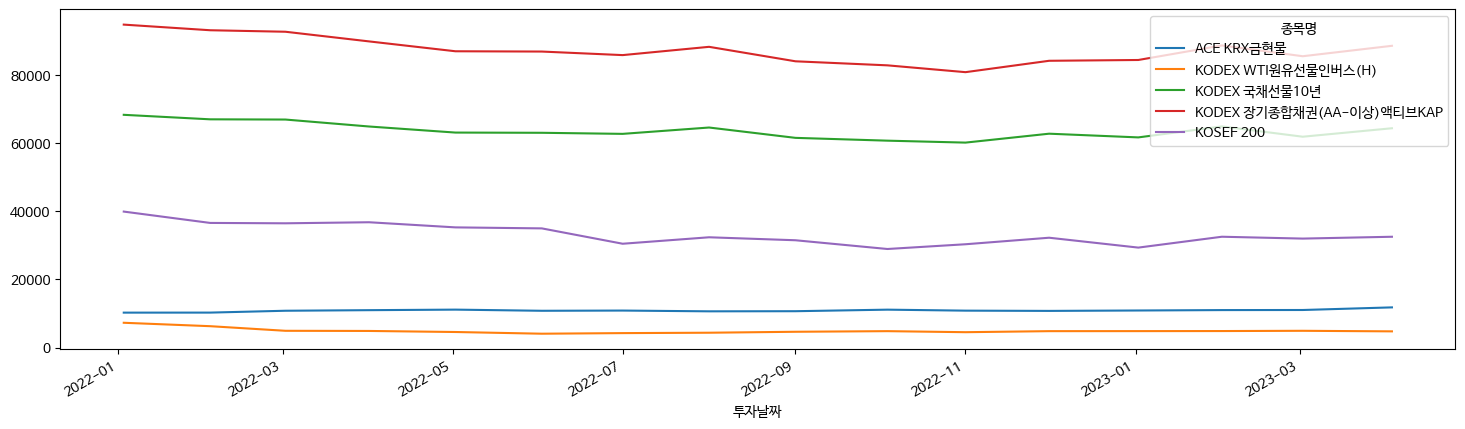

In [51]:
etf_pivot.plot(figsize=(18,5))